# AML Group Project

### Data consists of 72 samples: 44 standard risks and 28 low risk patients. Data consists of 471 genes across all samples.

## 1. Read Data & Display Data

In [10]:
aml.data <- read.table("clinical_9A_standard_low_risk_sd3.txt", sep="\t", header=TRUE)
aml.data

,ENSG00000000971.14,ENSG00000002726.18,ENSG00000005073.5,ENSG00000005108.14,ENSG00000005381.7,ENSG00000006042.10,ENSG00000007038.9,ENSG00000007062.10,ENSG00000008438.4,ENSG00000012223.11,⋯,ENSG00000274877.1,ENSG00000275325.3,ENSG00000275896.3,ENSG00000276600.3,ENSG00000277867.1,ENSG00000278847.1,ENSG00000279692.1,ENSG00000279717.1,ENSG00000280065.1,ENSG00000281128.1
TARGET-20-PADZCG,2.3978809,0.63907513,-3.72095083,-3.2300786,9.286936,-1.5556721,6.320313,4.3603724,3.5829304,3.11393936,⋯,-3.5041950,3.4209710,-3.2300790,4.159645000,0.1881677,-6.12135500,0.68943870,3.65440000,-5.2292350,-4.6821020
TARGET-20-PAEAKL,-0.3906116,1.66084294,0.81496101,-0.7644684,7.392326,-1.5277627,-5.180988,-3.1248987,-1.0234808,0.18916120,⋯,0.1891612,1.5976850,-6.9271450,2.172081000,1.4875200,-6.92714500,2.03916800,-4.14335400,-5.1809880,-6.9271450
TARGET-20-PAEIKD,-2.9394412,0.65971612,0.71085260,-4.6157031,5.096942,-6.9271451,5.440199,6.5438041,-3.1319687,0.05983831,⋯,-2.8520270,-1.1586650,-1.8954710,-1.730455000,-1.6180070,-0.32542030,1.19420900,-3.47963500,-5.3509160,-5.9336900
TARGET-20-PAKIWK,1.1271406,-3.97085290,-5.22503917,0.5479383,9.262971,-3.1834517,-2.005955,2.7860646,2.5487097,6.13428827,⋯,-4.1971810,-2.9591090,2.1059240,-1.953272000,-6.9271450,0.55704700,1.74856400,-6.92714500,-3.4492220,-6.9271450
TARGET-20-PAKIYW,-3.6932500,-0.23256902,0.43142784,-6.9271451,7.006890,-4.8017524,4.232719,4.7590370,-3.2523156,-1.06482478,⋯,-5.5040460,-3.2523160,-6.9271450,1.434421000,-4.8017520,-6.92714500,1.20289600,-3.25231600,-5.5040460,-5.5040460
TARGET-20-PAKLPD,-2.0089100,3.22923698,5.50034126,-3.3257051,9.334855,-6.9271451,5.440410,4.7105768,-0.9669548,1.61482443,⋯,-3.7016570,-2.8990590,-4.5551150,-2.780917000,0.1608091,-6.92714500,-2.67172100,-4.55511500,-4.5551150,-4.5551150
TARGET-20-PAKVGI,5.5555508,-2.98126897,-2.62452429,-1.9607690,8.288355,3.7314754,4.348787,4.8642751,1.8176980,5.26743140,⋯,-3.6571360,4.1790390,-3.2799810,-4.514835000,2.0038500,-5.63962200,-0.70806520,-3.45626900,2.4939020,-0.6266794
TARGET-20-PAMYAS,1.5151558,1.72318399,-6.92714510,-0.9139452,13.351231,-2.3348075,7.412475,3.9799027,3.1651296,3.63481372,⋯,0.1384839,-6.9271450,-2.4549120,2.772429000,-6.9271450,-1.93480000,-3.07031700,-1.04921700,0.9202449,-6.9271450
TARGET-20-PAMYGX,5.0429714,-4.01625491,5.59638070,-3.6499893,3.745859,4.1917152,4.683256,6.6462493,-2.2885107,0.76977146,⋯,-3.8835630,5.1484460,-0.2083295,-4.964358000,3.2584790,-6.92714500,-0.04878458,-2.84480100,2.7338880,1.3439800
TARGET-20-PANDIX,0.2533097,3.60420053,-6.02174817,-5.4697507,11.259260,-3.0232434,-1.907881,5.6742929,-2.8640671,-1.86955570,⋯,-6.9271450,3.8551070,-2.7207210,2.396929000,1.6088200,-0.87230790,2.04479000,-3.52065500,-3.4065070,-6.9271450


## 2. Seprate Data

In [24]:
stand.data <- aml.data[1:44, ] # standard risks
low.data <- aml.data[45:72, ]  # low risks

# stand.data
# low.data

# dim(stand.data)
# dim(low.data)

## 3. Exploring Data

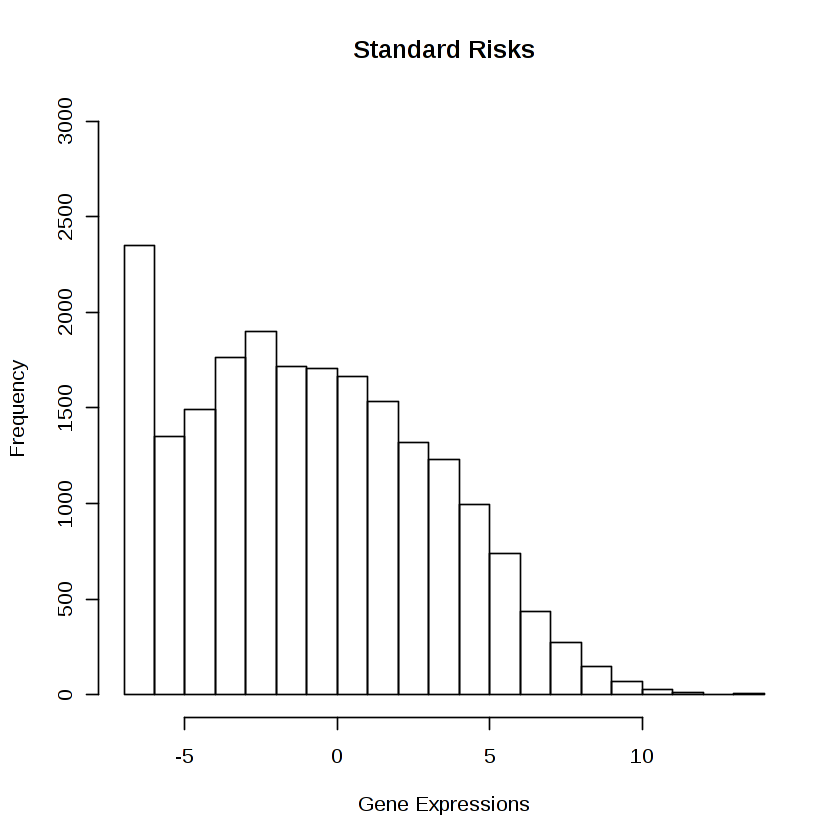

In [21]:
# Graph standard risks
hist(as.numeric(unlist(stand.data)), main="Standard Risks", xlab="Gene Expressions", ylim=c(0,3000))

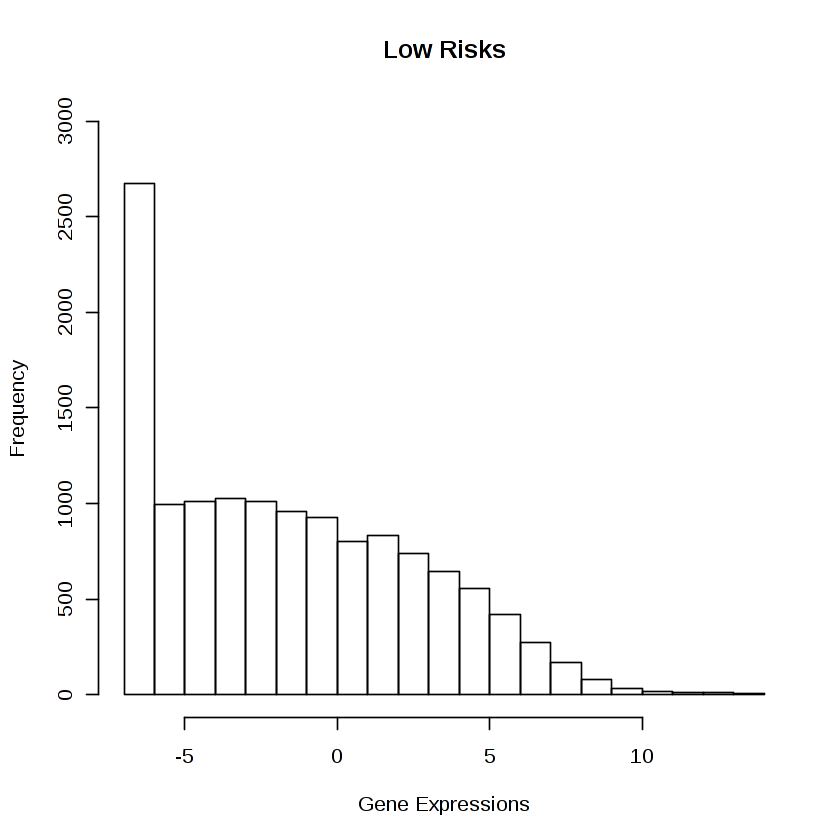

In [23]:
# Graph low risks
hist(as.numeric(unlist(low.data)), main="Low Risks", xlab="Gene Expressions", ylim=c(0,3000))

### Averaging Standard Risks for 471 Genes

In [31]:
ave.standard <- apply(stand.data, 2, 
                function (x) {
                    sum(x) / 44
                })
ave.standard

ENSG00000000971.14 ENSG00000002726.18  ENSG00000005073.5 ENSG00000005108.14 
       -0.31933168        -1.02812360        -1.29956298        -2.86512915 
 ENSG00000005381.7 ENSG00000006042.10  ENSG00000007038.9 ENSG00000007062.10 
        8.18431991        -3.03973936         0.78814952         2.02745682 
 ENSG00000008438.4 ENSG00000012223.11 ENSG00000012817.14 ENSG00000019169.10 
        0.53005382         2.30029634         0.02151312        -0.88960962 
ENSG00000037280.14 ENSG00000038427.14 ENSG00000046604.11 ENSG00000047648.20 
       -0.37226969         4.74238067        -1.11792027        -1.05278377 
 ENSG00000054598.6 ENSG00000057294.12 ENSG00000060718.17 ENSG00000061676.13 
        0.87916844        -0.41500228        -3.57795191        -0.75439941 
ENSG00000067048.15 ENSG00000067646.10 ENSG00000067798.12 ENSG00000073282.11 
        1.59124309        -0.85355482        -2.07174815        -0.92997002 
ENSG00000074964.15  ENSG00000076716.8 ENSG00000078399.14 ENSG00000079102.15 
        0.96730491        -0.95572071         5.82805883        -3.62818244 
ENSG00000080709.13 ENSG00000085276.16  ENSG00000086548.8 ENSG00000087116.12 
       -3.15545687        -0.83840495         0.05645094        -0.53163995 
ENSG00000087245.11 ENSG00000087495.15 ENSG00000095739.10 ENSG00000095917.12 
        0.69822250        -0.20392465         1.40754622        -0.23497274 
ENSG00000095970.15 ENSG00000096006.10  ENSG00000097096.8 ENSG00000099284.12 
       -2.36316813        -1.14541142        -1.26952093         0.64916397 
ENSG00000099725.13  ENSG00000100079.6 ENSG00000100095.17 ENSG00000100234.11 
       -0.32227156         1.52262059        -0.85697789        -1.51620718 
 ENSG00000100373.8  ENSG00000100448.3 ENSG00000100678.17 ENSG00000101333.15 
       -0.06462323         5.82108844        -1.99111649        -0.53481189 
ENSG00000102010.13 ENSG00000102287.15 ENSG00000102362.14 ENSG00000102595.17 
       -2.89332293        -2.66135130         0.06835457         0.68871693 
 ENSG00000102837.6 ENSG00000102854.13 ENSG00000104055.13  ENSG00000104918.6 
       -1.95975637         1.49173674         0.96043235         2.00025098 
ENSG00000105048.15  ENSG00000105205.6  ENSG00000105251.9 ENSG00000105270.13 
        0.14594497         2.87942695        -1.91473703         1.94783771 
ENSG00000105971.13 ENSG00000105974.10 ENSG00000105976.13 ENSG00000105997.21 
       -1.35491560        -0.41908626        -2.20082373         3.35056478 
 ENSG00000106004.4  ENSG00000106006.6  ENSG00000106236.3 ENSG00000106541.10 
        4.24098082         1.64890796        -1.52880571        -2.45352001 
ENSG00000106714.16  ENSG00000107447.6 ENSG00000107562.15 ENSG00000108244.15 
       -2.22432296        -1.52646698         1.01903794        -1.81184887 
 ENSG00000108511.9 ENSG00000108688.10  ENSG00000108691.8  ENSG00000109158.9 
       -1.82627887        -2.79169942         0.50146519        -2.28543506 
ENSG00000109576.12  ENSG00000109819.7  ENSG00000111052.6  ENSG00000111057.9 
       -1.68853195        -2.76500801         1.29528509         0.88388091 
ENSG00000111344.10 ENSG00000112077.14 ENSG00000112276.12 ENSG00000112414.13 
       -2.17223851         2.97676290        -1.65795931        -1.03101014 
ENSG00000112559.12  ENSG00000113100.8 ENSG00000113396.11 ENSG00000113494.15 
       -2.14126292        -4.02175963        -3.96386935        -0.05479092 
ENSG00000114374.11  ENSG00000114405.9 ENSG00000114948.11  ENSG00000115138.9 
       -0.82612138        -1.68490788        -1.17679756         0.82364678 
 ENSG00000115461.4 ENSG00000115602.15 ENSG00000115705.19 ENSG00000117114.18 
       -1.15335230        -0.03373515        -5.28765018        -2.41853522 
ENSG00000118113.10  ENSG00000118231.4  ENSG00000118523.5 ENSG00000119919.10 
        0.57680501        -2.34859495         2.02724426        -3.24153260 
 ENSG00000120068.6  ENSG00000120075.5 ENSG00000120093.10  ENSG00000120149.8 
       -3.26596128        -1.99952581         1.36019416        -2.540775

### Averaging Low Risks for 471 Genes

In [33]:
ave.low <- apply(stand.data, 2, 
                function (x) {
                    sum(x) / 28
                })
ave.low

ENSG00000000971.14 ENSG00000002726.18  ENSG00000005073.5 ENSG00000005108.14 
       -0.50180693        -1.61562280        -2.04217040        -4.50234581 
 ENSG00000005381.7 ENSG00000006042.10  ENSG00000007038.9 ENSG00000007062.10 
       12.86107414        -4.77673329         1.23852068         3.18600357 
 ENSG00000008438.4 ENSG00000012223.11 ENSG00000012817.14 ENSG00000019169.10 
        0.83294172         3.61475139         0.03380634        -1.39795798 
ENSG00000037280.14 ENSG00000038427.14 ENSG00000046604.11 ENSG00000047648.20 
       -0.58499522         7.45231248        -1.75673185        -1.65437449 
 ENSG00000054598.6 ENSG00000057294.12 ENSG00000060718.17 ENSG00000061676.13 
        1.38155041        -0.65214643        -5.62249586        -1.18548479 
ENSG00000067048.15 ENSG00000067646.10 ENSG00000067798.12 ENSG00000073282.11 
        2.50052485        -1.34130043        -3.25560424        -1.46138147 
ENSG00000074964.15  ENSG00000076716.8 ENSG00000078399.14 ENSG00000079102.15 
        1.52005058        -1.50184684         9.15837816        -5.70142956 
ENSG00000080709.13 ENSG00000085276.16  ENSG00000086548.8 ENSG00000087116.12 
       -4.95857508        -1.31749349         0.08870862        -0.83543420 
ENSG00000087245.11 ENSG00000087495.15 ENSG00000095739.10 ENSG00000095917.12 
        1.09720678        -0.32045302         2.21185835        -0.36924287 
ENSG00000095970.15 ENSG00000096006.10  ENSG00000097096.8 ENSG00000099284.12 
       -3.71354992        -1.79993222        -1.99496146         1.02011481 
ENSG00000099725.13  ENSG00000100079.6 ENSG00000100095.17 ENSG00000100234.11 
       -0.50642674         2.39268950        -1.34667954        -2.38261128 
 ENSG00000100373.8  ENSG00000100448.3 ENSG00000100678.17 ENSG00000101333.15 
       -0.10155080         9.14742470        -3.12889735        -0.84041869 
ENSG00000102010.13 ENSG00000102287.15 ENSG00000102362.14 ENSG00000102595.17 
       -4.54665032        -4.18212347         0.10741432         1.08226946 
 ENSG00000102837.6 ENSG00000102854.13 ENSG00000104055.13  ENSG00000104918.6 
       -3.07961715         2.34415774         1.50925083         3.14325154 
ENSG00000105048.15  ENSG00000105205.6  ENSG00000105251.9 ENSG00000105270.13 
        0.22934209         4.52481378        -3.00887247         3.06088783 
ENSG00000105971.13 ENSG00000105974.10 ENSG00000105976.13 ENSG00000105997.21 
       -2.12915308        -0.65856413        -3.45843729         5.26517322 
 ENSG00000106004.4  ENSG00000106006.6  ENSG00000106236.3 ENSG00000106541.10 
        6.66439843         2.59114107        -2.40240898        -3.85553144 
ENSG00000106714.16  ENSG00000107447.6 ENSG00000107562.15 ENSG00000108244.15 
       -3.49536465        -2.39873383         1.60134534        -2.84719109 
 ENSG00000108511.9 ENSG00000108688.10  ENSG00000108691.8  ENSG00000109158.9 
       -2.86986680        -4.38695624         0.78801673        -3.59139795 
ENSG00000109576.12  ENSG00000109819.7  ENSG00000111052.6  ENSG00000111057.9 
       -2.65340734        -4.34501259         2.03544800         1.38895572 
ENSG00000111344.10 ENSG00000112077.14 ENSG00000112276.12 ENSG00000112414.13 
       -3.41351766         4.67777027        -2.60536463        -1.62015879 
ENSG00000112559.12  ENSG00000113100.8 ENSG00000113396.11 ENSG00000113494.15 
       -3.36484173        -6.31990800        -6.22893756        -0.08610002 
ENSG00000114374.11  ENSG00000114405.9 ENSG00000114948.11  ENSG00000115138.9 
       -1.29819074        -2.64771238        -1.84925331         1.29430208 
 ENSG00000115461.4 ENSG00000115602.15 ENSG00000115705.19 ENSG00000117114.18 
       -1.81241076        -0.05301239        -8.30916457        -3.80055535 
ENSG00000118113.10  ENSG00000118231.4  ENSG00000118523.5 ENSG00000119919.10 
        0.90640787        -3.69064921         3.18566956        -5.09383694 
 ENSG00000120068.6  ENSG00000120075.5 ENSG00000120093.10  ENSG00000120149.8 
       -5.13222487        -3.14211199         2.13744796        -3.992647

## 4. Apply T-Test to Standard & Low Risks to all 471 Genes

In [40]:
# apply above t-test to standard risk 
# and to low risk patients to all 471 genes
pvalue.vec <- apply (aml.data, 2, function (x){ t.test(x[1:44], x[45:72])$p.value})
pvalue.vec

# get indexes where p-value is less than 0.1%
indexes <- which(pvalue.vec < 0.001)

ENSG00000000971.14 ENSG00000002726.18  ENSG00000005073.5 ENSG00000005108.14 
      5.243230e-03       5.551712e-01       2.165166e-03       1.168141e-03 
 ENSG00000005381.7 ENSG00000006042.10  ENSG00000007038.9 ENSG00000007062.10 
      3.012934e-08       1.128757e-01       2.064130e-02       3.321995e-02 
 ENSG00000008438.4 ENSG00000012223.11 ENSG00000012817.14 ENSG00000019169.10 
      3.031574e-01       3.544493e-01       9.134954e-01       8.235943e-02 
ENSG00000037280.14 ENSG00000038427.14 ENSG00000046604.11 ENSG00000047648.20 
      4.352176e-05       4.658179e-01       3.211943e-06       1.863567e-06 
 ENSG00000054598.6 ENSG00000057294.12 ENSG00000060718.17 ENSG00000061676.13 
      6.199036e-01       3.228042e-05       4.381355e-04       1.920264e-03 
ENSG00000067048.15 ENSG00000067646.10 ENSG00000067798.12 ENSG00000073282.11 
      8.356056e-01       8.092556e-01       5.374041e-03       2.580380e-04 
ENSG00000074964.15  ENSG00000076716.8 ENSG00000078399.14 ENSG00000079102.15 
      9.716393e-01       1.508188e-04       8.685003e-07       9.170875e-03 
ENSG00000080709.13 ENSG00000085276.16  ENSG00000086548.8 ENSG00000087116.12 
      3.047315e-04       2.956919e-06       9.692861e-01       2.773834e-01 
ENSG00000087245.11 ENSG00000087495.15 ENSG00000095739.10 ENSG00000095917.12 
      4.782093e-06       3.627306e-08       9.005789e-04       1.102238e-08 
ENSG00000095970.15 ENSG00000096006.10  ENSG00000097096.8 ENSG00000099284.12 
      1.863711e-01       3.760465e-05       3.683899e-06       4.820565e-04 
ENSG00000099725.13  ENSG00000100079.6 ENSG00000100095.17 ENSG00000100234.11 
      9.068617e-01       3.147431e-01       2.160971e-02       2.082097e-02 
 ENSG00000100373.8  ENSG00000100448.3 ENSG00000100678.17 ENSG00000101333.15 
      7.026310e-01       2.082648e-01       8.968206e-01       5.111665e-05 
ENSG00000102010.13 ENSG00000102287.15 ENSG00000102362.14 ENSG00000102595.17 
      8.248676e-01       6.543473e-02       2.009647e-07       4.806612e-07 
 ENSG00000102837.6 ENSG00000102854.13 ENSG00000104055.13  ENSG00000104918.6 
      6.303586e-02       3.073187e-02       6.121677e-07       6.471186e-02 
ENSG00000105048.15  ENSG00000105205.6  ENSG00000105251.9 ENSG00000105270.13 
      3.101173e-02       1.099202e-01       1.282446e-02       8.253369e-03 
ENSG00000105971.13 ENSG00000105974.10 ENSG00000105976.13 ENSG00000105997.21 
      4.584405e-01       7.952200e-01       9.752686e-02       1.815759e-07 
 ENSG00000106004.4  ENSG00000106006.6  ENSG00000106236.3 ENSG00000106541.10 
      7.222326e-05       8.270479e-09       7.101682e-04       3.983786e-01 
ENSG00000106714.16  ENSG00000107447.6 ENSG00000107562.15 ENSG00000108244.15 
      5.289226e-06       3.041257e-04       3.206472e-01       1.097057e-03 
 ENSG00000108511.9 ENSG00000108688.10  ENSG00000108691.8  ENSG00000109158.9 
      1.513951e-01       1.258059e-02       7.374922e-03       1.601523e-05 
ENSG00000109576.12  ENSG00000109819.7  ENSG00000111052.6  ENSG00000111057.9 
      4.566982e-04       7.282543e-03       1.207496e-04       7.285440e-02 
ENSG00000111344.10 ENSG00000112077.14 ENSG00000112276.12 ENSG00000112414.13 
      9.870022e-01       7.407858e-04       5.921767e-07       5.408115e-07 
ENSG00000112559.12  ENSG00000113100.8 ENSG00000113396.11 ENSG00000113494.15 
      6.442892e-01       5.417448e-01       7.608005e-03       8.025307e-01 
ENSG00000114374.11  ENSG00000114405.9 ENSG00000114948.11  ENSG00000115138.9 
      6.335578e-01       3.684425e-08       7.282465e-05       2.651823e-01 
 ENSG00000115461.4 ENSG00000115602.15 ENSG00000115705.19 ENSG00000117114.18 
      3.968713e-01       4.385161e-03       2.465281e-05       4.944477e-03 
ENSG00000118113.10  ENSG00000118231.4  ENSG00000118523.5 ENSG00000119919.10 
      6.040745e-02       4.223155e-01       3.901028e-05       3.374252e-02 
 ENSG00000120068.6  ENSG00000120075.5 ENSG00000120093.10  ENSG00000120149.8 
      1.328574e-02       2.713842e-01       3.167628e-01       3.879992e-

[1] 187

## 5. Get Data Subsets for the Differentially Expressed Genes

In [43]:
subStand.data <- aml.data[1:44, indexes] # subset of standard risks
subLow.data <- aml.data[45:72, indexes]  # subset of low risks

# subStand.data
# subLow.data

,ENSG00000005381.7,ENSG00000037280.14,ENSG00000046604.11,ENSG00000047648.20,ENSG00000057294.12,ENSG00000060718.17,ENSG00000073282.11,ENSG00000076716.8,ENSG00000078399.14,ENSG00000080709.13,⋯,ENSG00000269586.6,ENSG00000270182.1,ENSG00000271447.4,ENSG00000271474.1,ENSG00000271952.1,ENSG00000274736.3,ENSG00000275325.3,ENSG00000276600.3,ENSG00000277867.1,ENSG00000281128.1
TARGET-20-PADZCG,9.286936,0.005868075,-1.05422050,0.33601057,-1.09153203,-3.4069196,2.52812467,-2.16248113,5.7896054,-6.927145103,⋯,-5.2292350,-0.786089800,-1.1892640,-4.12292200,0.3076292,2.8369750,3.4209710,4.159645000,0.1881677,-4.6821020
TARGET-20-PAEAKL,7.392326,0.637927383,-4.41383682,-0.23467893,3.12029634,-6.9271451,1.47753109,-1.84117048,5.5695299,5.078136372,⋯,-6.9271450,-0.672618200,-3.7190590,2.56775000,1.9943340,3.4591860,1.5976850,2.172081000,1.4875200,-6.9271450
TARGET-20-PAEIKD,5.096942,-1.355027609,-1.69199036,-0.79033192,2.72508749,-5.9336900,2.36809516,-1.58239124,7.7895159,2.802902119,⋯,2.7018040,-1.385395000,-1.4805340,-0.29627670,-0.2536362,4.4461420,-1.1586650,-1.730455000,-1.6180070,-5.9336900
TARGET-20-PAKIWK,9.262971,0.186379310,-1.71535058,-3.06692379,-2.23833181,-2.7650021,-2.06063537,-1.67213660,2.4952177,-5.838407927,⋯,-5.8384080,-5.838408000,0.3100625,-5.83840800,-6.9271450,-1.5111670,-2.9591090,-1.953272000,-6.9271450,-6.9271450
TARGET-20-PAKIYW,7.006890,-0.666509362,-3.69324995,0.13729730,1.12277233,-4.8017524,2.66062384,-1.67939211,8.1418470,-1.242094232,⋯,-3.0738610,-4.801752000,-1.8131040,-3.25231600,1.8703380,6.8394350,-3.2523160,1.434421000,-4.8017520,-5.5040460
TARGET-20-PAKLPD,9.334855,-4.555115043,-2.22337202,-0.38973735,-1.88182037,-3.1690476,-2.47537665,1.06372973,9.3065931,3.177272582,⋯,-6.9271450,1.283053000,-5.0070580,-3.16904800,-0.8140431,4.6288830,-2.8990590,-2.780917000,0.1608091,-4.5551150
TARGET-20-PAKVGI,8.288355,0.180367414,0.19536533,5.42484906,4.28624460,0.9009953,1.73286605,-1.89575398,7.7908934,-4.970280536,⋯,-6.9271450,-0.794318200,-2.1754910,-3.89056600,-3.4562690,1.0320860,4.1790390,-4.514835000,2.0038500,-0.6266794
TARGET-20-PAMYAS,13.351231,3.192873716,-5.37776335,-3.27620814,-4.64802043,-6.9271451,-6.92714510,-6.92714510,-1.1470011,-6.927145103,⋯,-6.9271450,-6.927145000,3.6765020,-6.92714500,-0.4411037,0.4031811,-6.9271450,2.772429000,-6.9271450,-6.9271450
TARGET-20-PAMYGX,3.745859,0.054075933,4.66982056,-1.31776376,3.82677694,-1.2144934,-1.92017237,-1.11812400,8.0022580,-6.140937120,⋯,-1.4290000,-0.228314500,-2.3310960,-5.63491000,0.5817107,0.2830951,5.1484460,-4.964358000,3.2584790,1.3439800
TARGET-20-PANDIX,11.259260,-0.352885296,-5.46975067,-0.66117945,-4.50348657,-4.5034866,1.45875539,-0.03398838,4.3017747,-6.927145103,⋯,3.8130160,-3.300732000,-0.9702943,-6.02174800,-6.0217480,3.6884990,3.8551070,2.396929000,1.6088200,-6.9271450


,ENSG00000005381.7,ENSG00000037280.14,ENSG00000046604.11,ENSG00000047648.20,ENSG00000057294.12,ENSG00000060718.17,ENSG00000073282.11,ENSG00000076716.8,ENSG00000078399.14,ENSG00000080709.13,⋯,ENSG00000269586.6,ENSG00000270182.1,ENSG00000271447.4,ENSG00000271474.1,ENSG00000271952.1,ENSG00000274736.3,ENSG00000275325.3,ENSG00000276600.3,ENSG00000277867.1,ENSG00000281128.1
TARGET-20-PALGKX,12.960240,4.8867290,-2.353451,-6.9271451,-1.38406568,-6.927145,-2.46388871,-3.3999245,-6.92714510,-6.927145,⋯,-5.4651630,-6.9271450,4.4489090,-3.399924,-1.9807540,0.1983663,-5.4651630,4.9976790,-5.465163,-6.9271450
TARGET-20-PANAEV,7.327343,-1.2079602,-5.270266,0.3182506,-5.27026642,-2.578062,-0.93967120,0.5275258,7.97358640,-4.027968,⋯,0.5275258,-0.2217186,-2.4331550,-5.270266,-6.9271450,3.6418570,-6.9271450,-0.1922534,-6.927145,-6.9271450
TARGET-20-PANBZH,12.331135,2.4439421,-6.927145,-4.5675124,-5.67772066,-6.927145,-5.01835866,-2.3173361,3.90852585,-6.927145,⋯,-2.0917610,-6.9271450,2.5592520,-3.042093,-3.3398130,-1.8371740,-3.3398130,1.8510440,-5.677721,-6.9271450
TARGET-20-PANHYK,12.607130,5.4080244,-4.411091,-0.4624302,-3.38856385,-6.927145,0.66789814,-6.9271451,-5.80279145,-6.927145,⋯,-6.9271450,-6.9271450,3.6457920,-6.927145,-6.9271450,-1.0202080,-4.4110910,3.8946280,-6.927145,-4.7444160
TARGET-20-PANKKE,12.387536,4.1458431,-6.927145,-2.7051228,-6.92714510,-6.927145,-2.39873959,-5.6215696,-5.62156956,-6.927145,⋯,-6.9271450,-6.9271450,2.8585070,-6.927145,-6.9271450,-1.6318850,-4.9476150,3.2129390,-6.927145,-6.9271450
TARGET-20-PANLIR,10.680093,0.3360527,-1.948790,-0.3710742,-2.34865254,-1.815453,-0.83646829,-0.1745011,-2.90373537,-6.927145,⋯,-6.9271450,-6.9271450,-1.5808790,-6.927145,-6.9271450,2.2049840,-3.8176390,-0.2585794,-6.927145,-4.9083870
TARGET-20-PANLIZ,11.460361,6.9758723,-3.133779,-3.2498812,-5.27447434,-6.927145,-4.25803239,-5.2744743,-0.00741785,-5.876068,⋯,-6.9271450,-5.8760680,5.0077060,-6.927145,-6.9271450,-0.2278256,-0.8741071,-1.0211160,-6.927145,-6.9271450
TARGET-20-PANLJN,11.896301,-4.5013129,3.020052,-6.9271451,0.04602502,-4.008743,-0.49617281,5.4762509,7.52402155,-6.927145,⋯,-6.9271450,1.6483370,-1.7577370,-6.927145,-6.9271450,0.2559625,-2.8997380,4.2602170,-6.927145,-6.9271450
TARGET-20-PANNHB,12.690428,3.1308476,-4.965883,-5.6361240,-2.09459810,-6.927145,-3.11741103,-4.5100256,-3.88536609,-5.636124,⋯,-6.9271450,-6.9271450,3.7679340,-6.927145,-6.9271450,-2.0231310,-4.5100260,3.1733000,-6.927145,-6.9271450
TARGET-20-PANPTM,12.407249,5.5520556,-5.362333,-6.9271451,-3.04854461,-6.927145,-3.49526171,-6.9271451,2.21500332,-6.927145,⋯,-6.9271450,-6.9271450,4.2055570,-6.927145,-6.9271450,-4.1457500,-2.7079370,4.8210190,-6.927145,-6.9271450


## 6. Plot Averages for Differentially Expressed